In [6]:
# -*- coding: utf-8 -*-
"""
Versión definitiva para el CSV de La Chancla (mayo.csv)
- Limpia encabezados, filas vacías y títulos de familia
- Convierte correctamente los números con comas
- Detecta valores negativos
"""
meses=['mayo.csv','junio.csv','julio.csv','agosto.csv','septiembre.csv']
import pandas as pd
for i in meses:
    # 1️⃣ Leer CSV con tabulador
    df = pd.read_csv(i, sep="\t", encoding="latin-1", engine="python")
    
    # 2️⃣ Quitar filas completamente vacías
    df = df.dropna(how="all")
    
    # 3️⃣ Quitar filas que son títulos de familia (sin 'Código' pero con texto en 'Descripción')
    df = df[~((df["Código"].isna()) & (df["Descripción"].notna()))]
    
    # 4️⃣ Quitar filas que no tienen ni código ni descripción
    df = df[df["Código"].notna() | df["Descripción"].notna()]
    
    # 5️⃣ Limpiar columnas numéricas
    def limpiar_numero(valor):
        if pd.isna(valor):
            return 0.0
        valor = str(valor).replace('.', '').replace(',', '.').replace('"', '').strip()
        try:
            return float(valor)
        except:
            return 0.0
    
    # 6️⃣ Columnas que contienen números
    columnas_numericas = [
        "Unidades",
        "Importe Total",
        "Importe Total  I.I.",
        "% Venta",
        "% Acumu.",
        "Beneficio B.I.",
        "% Ben."
    ]
    
    for col in columnas_numericas:
        if col in df.columns:
            df[col] = df[col].apply(limpiar_numero)
        else:
            print(f"⚠️ Columna no encontrada: {col}")
    
    # 7️⃣ Buscar negativos
    columnas_existentes = [c for c in columnas_numericas if c in df.columns]
    negativos = df[(df[columnas_existentes] < 0).any(axis=1)]
    
    # 8️⃣ Mostrar resultados
    print("\n=== FILAS CON VALORES NEGATIVOS DETECTADAS ===")
    if not negativos.empty:
        print(negativos[["Código", "Descripción"] + columnas_existentes])
        total_neg = negativos["Importe Total"].sum()
        print(f"\n🔻 Total negativo detectado: {total_neg:,.2f} €")
    else:
        print("✅ No se han detectado valores negativos.")
    
    # 9️⃣ Guardar negativos en archivo nuevo
    negativos.to_csv("lineas_negativas_ABC.csv", index=False, encoding="utf-8")
    print(f"\n{i}\n📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.")





=== FILAS CON VALORES NEGATIVOS DETECTADAS ===
    Código   Descripción  Unidades  Importe Total  Importe Total  I.I.  \
1        ç           NaN      49.0        -167.52              -184.27   
10  000011  NESTEA LIMÓN      80.0         163.64               180.00   

    % Venta  % Acumu.  Beneficio B.I.   % Ben.  
1    100.00     100.0         -167.52   100.00  
10     2.49      27.1        -5516.36 -3371.11  

🔻 Total negativo detectado: -3.88 €

mayo.csv
📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.

=== FILAS CON VALORES NEGATIVOS DETECTADAS ===
    Código   Descripción  Unidades  Importe Total  Importe Total  I.I.  \
1        ç           NaN      44.0        -152.58              -167.84   
11  000011  NESTEA LIMÓN      88.0         180.00               198.00   

    % Venta  % Acumu.  Beneficio B.I.   % Ben.  
1    100.00    100.00         -152.58   100.00  
11     2.13     28.88        -6068.00 -3371.11  

🔻 Total negativo detectado: 27.42 €

junio.csv
📁 Archivo 

C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1939711335.py:33: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


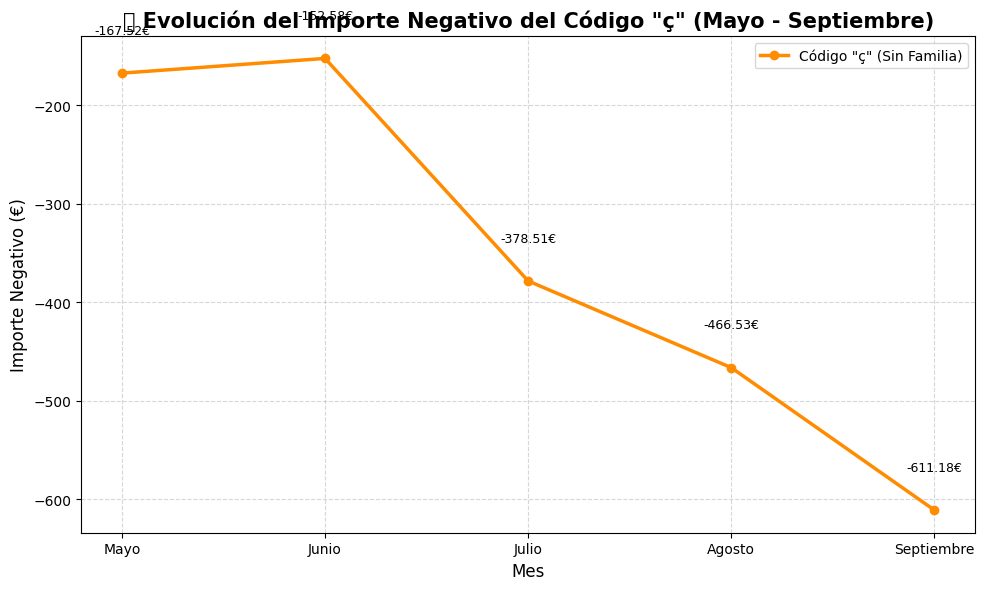

In [9]:
import matplotlib.pyplot as plt

# Datos del código "ç"
negativo_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# Crear gráfico
plt.figure(figsize=(10,6))
plt.plot(
    negativo_c.keys(),
    negativo_c.values(),
    marker='o',
    color='darkorange',
    linewidth=2.5,
    label='Código "ç" (Sin Familia)'
)

# Etiquetas encima de cada punto
for mes, valor in negativo_c.items():
    plt.text(mes, valor + 40, f"{valor:.2f}€", ha='center', color='black', fontsize=9)

# Decoración
plt.title('📉 Evolución del Importe Negativo del Código "ç" (Mayo - Septiembre)', fontsize=15, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Importe Negativo (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()



In [10]:
import pandas as pd
import glob

# 📂 1️⃣ Buscar automáticamente todos los archivos mensuales CSV
archivos = sorted(glob.glob("*.csv"))  # se asume que están en la misma carpeta

# 📊 2️⃣ Diccionario donde guardaremos el total facturado por mes
facturacion_mensual = {}

# 🧮 3️⃣ Función para limpiar números con comas y puntos
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return 0.0

# 🔁 4️⃣ Recorremos cada archivo y calculamos el total del "Importe Total"
for archivo in archivos:
    try:
        # Leer CSV con separador de tabulador
        df = pd.read_csv(archivo, sep='\t', encoding='latin-1', engine='python')

        # Normalizar encabezados
        df.columns = [c.strip() for c in df.columns]

        # Asegurar que la columna exista
        if "Importe Total" in df.columns:
            df["Importe Total"] = df["Importe Total"].apply(to_float)
            total_mes = df["Importe Total"].sum()
        else:
            total_mes = 0.0

        # Guardar el total con el nombre del mes (quitando .csv)
        mes = archivo.replace(".csv", "").capitalize()
        facturacion_mensual[mes] = total_mes

    except Exception as e:
        print(f"⚠️ Error procesando {archivo}: {e}")

# 📈 5️⃣ Mostrar resultados ordenados
print("\n=== TOTAL FACTURADO POR MES ===")
for mes, total in facturacion_mensual.items():
    print(f"{mes:<12} {total:,.2f} €")



=== TOTAL FACTURADO POR MES ===
Agosto       151,539.63 €
Julio        145,289.67 €
Junio        132,869.76 €
Ktlm01       1,023,051.50 €
Lineas_negativas_abc 0.00 €
Mayo         118,726.54 €
Septiembre   115,637.13 €


In [11]:
import pandas as pd

# Función para limpiar números con comas y puntos
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return 0.0

# Archivos mensuales
archivos = {
    'Mayo': 'mayo.csv',
    'Junio': 'junio.csv',
    'Julio': 'julio.csv',
    'Agosto': 'agosto.csv',
    'Septiembre': 'septiembre.csv'
}

# Diccionario para almacenar los totales facturados
totales = {}

for mes, archivo in archivos.items():
    df = pd.read_csv(archivo, sep='\t', encoding='latin-1', engine='python')
    df.columns = [c.strip() for c in df.columns]
    if 'Importe Total' in df.columns:
        df['Importe Total'] = df['Importe Total'].apply(to_float)
        total_mes = df['Importe Total'].sum()
        totales[mes] = total_mes

# Mostrar los resultados
print("\n=== TOTAL FACTURADO POR MES ===")
for mes, total in totales.items():
    print(f"{mes:<12} {total:,.2f} €")



=== TOTAL FACTURADO POR MES ===
Mayo         118,726.54 €
Junio        132,869.76 €
Julio        145,289.67 €
Agosto       151,539.63 €
Septiembre   115,637.13 €


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\47432675.py:30: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


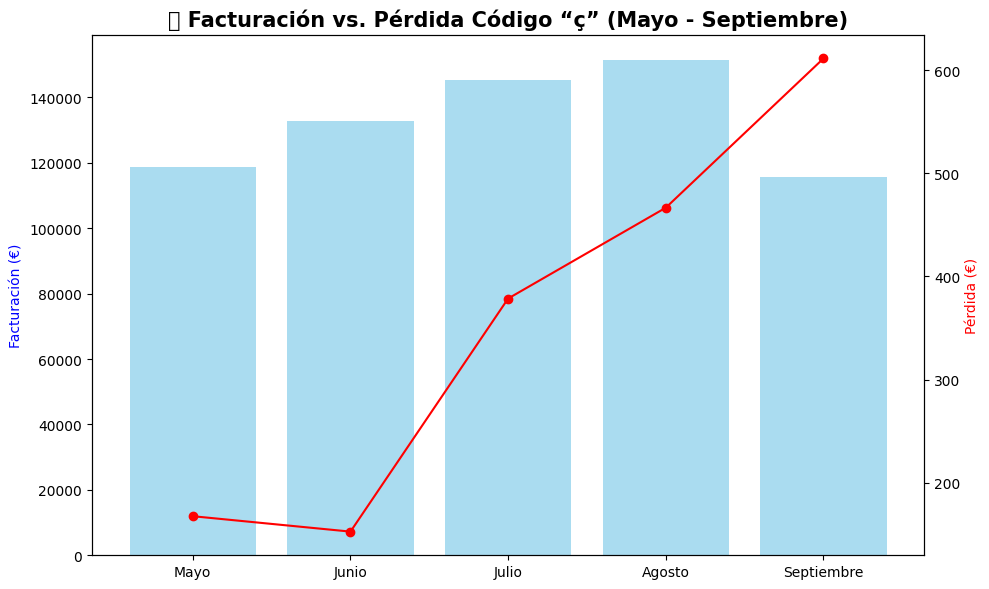

In [12]:
import matplotlib.pyplot as plt

# Negativos detectados del código “ç”
negativos_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# Gráfico combinado
meses = list(totales.keys())
facturacion = [totales[m] for m in meses]
negativos = [abs(negativos_c[m]) for m in meses]  # en positivo para comparación

fig, ax1 = plt.subplots(figsize=(10,6))

# Facturación (barras)
ax1.bar(meses, facturacion, color='skyblue', alpha=0.7, label='Facturación Total (€)')
ax1.set_ylabel('Facturación (€)', color='blue')

# Negativos (línea)
ax2 = ax1.twinx()
ax2.plot(meses, negativos, 'o-r', label='Pérdida Código "ç" (€)')
ax2.set_ylabel('Pérdida (€)', color='red')

# Título y formato
plt.title('💶 Facturación vs. Pérdida Código “ç” (Mayo - Septiembre)', fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1784975898.py:38: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


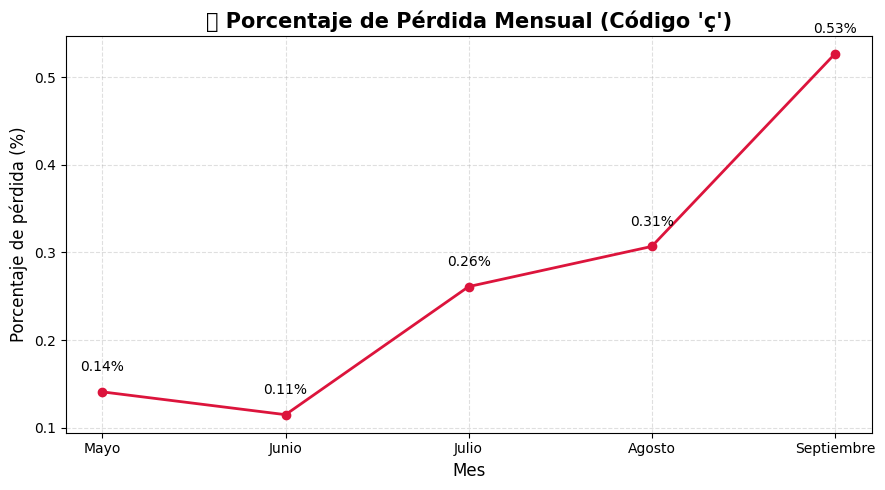

In [13]:
import matplotlib.pyplot as plt

# 🔹 Datos reales aproximados de tu gráfico anterior
facturacion = {
    'Mayo': 119000,
    'Junio': 133000,
    'Julio': 145000,
    'Agosto': 152000,
    'Septiembre': 116000
}

negativos_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# 🧮 Calcular porcentaje de pérdida
porcentajes = {mes: abs(negativos_c[mes]) / facturacion[mes] * 100 for mes in facturacion}

# 📊 Crear gráfico
meses = list(porcentajes.keys())
valores = list(porcentajes.values())

plt.figure(figsize=(9,5))
plt.plot(meses, valores, 'o-', color='crimson', linewidth=2)
plt.title("📉 Porcentaje de Pérdida Mensual (Código 'ç')", fontsize=15, fontweight='bold')
plt.ylabel("Porcentaje de pérdida (%)", fontsize=12)
plt.xlabel("Mes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Etiquetas encima de los puntos
for i, v in enumerate(valores):
    plt.text(i, v + 0.02, f"{v:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
